In [1]:
!pip install yfinance
import yfinance as yf

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     -- ------------------------------------ 61.4/948.2 kB 3.4 MB/s eta 0:00:01
     --- ----------------------------------- 92.2/948.2 kB 1.7 MB/s eta 0:00:01
     ---- --------------------------------- 122.9/948.2 kB 1.2 MB/s eta 0:00:01
     ------ ------------------------------- 163.8/948.2 kB 1.1 MB/s eta 0:00:01
     ------- ---------------------------- 204.8/948.2 kB 958.4 kB/s eta 0:00:01
     --------- -------------------------- 256.0/948.2 kB 983.0 kB/s eta 0:00:01
     ----------- ------------------------ 307.2/948.2 kB 999.9 kB/s eta 0:00:01
     -------------- ----------------------- 358.4/948.2 kB 1.0 MB/s eta 0:00:01
     --------------- ---------------------- 389.1/948.2 kB 1.0 MB/s eta 0:00:01
     ----------------- -------------------- 440.3/948.2 kB 1.0 MB/s eta 0:00:01
     ----------------- ------------------ 471.0/948.2 kB 952.1 kB/s eta 0:00:01
     ------------------ ----------------- 491.5

In [3]:
# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2010-06-29', end='2025-01-01')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send the request and parse content
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Look for tables by class
tables = soup.find_all("table", {"class": "historical_data_table table"})

if not tables:
    raise ValueError("Could not find the Tesla Quarterly Revenue table. Please check the website structure.")

# Select the first table matching the class
tesla_revenue_table = tables[0]

# Extract data rows and clean
data = []
for row in tesla_revenue_table.find_all("tr")[1:]:  # Skip the header row
    columns = row.find_all("td")
    if len(columns) == 2:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip().replace("$", "").replace(",", "")
        if revenue:  # Skip empty rows
            data.append([date, revenue])

# Create a DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Display the last five rows
print(tesla_revenue.tail())


    Date Revenue
10  2013    2013
11  2012     413
12  2011     204
13  2010     117
14  2009     112


In [11]:
import yfinance as yf

# Download GameStop stock data
gme_data = yf.download("GME", start="2010-01-01", end="2025-01-01")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first 5 rows
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                  GME       GME       GME       GME        GME
0      2010-01-04  3.854642  3.863059  3.703150  3.714933   26702800
1      2010-01-05  3.959004  3.996036  3.854643  3.856326   21269600
2      2010-01-06  4.044851  4.056634  3.908507  3.948905   21471200
3      2010-01-07  3.443930  3.563441  3.268872  3.368184  164761200
4      2010-01-08  3.415315  3.573540  3.405215  3.474228   47872400


In [15]:
!pip install selenium

  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.5 MB 1.7 MB/s eta 0:00:06
    --------------------------------------- 0.1/9.5 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.5 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.3/9.5 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.5 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.5 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.5 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.5 MB 1.8 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.5 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.5 MB 1.7 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.5 MB 1.6 MB/s eta 0:00:06
   --- ------------------------

In [21]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up ChromeDriver (update the path here)
service = Service(r"C:\path\to\chromedriver\chromedriver.exe")  # Update this with your ChromeDriver path

driver = webdriver.Chrome(service=service)
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
driver.get(url)

# Wait for the table to load
try:
    # Explicit wait for the table to be present
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//table[contains(., 'GameStop Quarterly Revenue')]")))
    
    # Locate table with revenue data
    gme_revenue_table = driver.find_element(By.XPATH, "//table[contains(., 'GameStop Quarterly Revenue')]")
    rows = gme_revenue_table.find_elements(By.TAG_NAME, "tr")

    # Extract data
    data = []
    for row in rows:
        cols = row.find_elements(By.TAG_NAME, "td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:  # Skip empty revenue rows
                data.append([date, revenue])

    # Create DataFrame
    gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
    gme_revenue.dropna(inplace=True)

    # Display the last 5 rows
    print(gme_revenue.tail())

finally:
    driver.quit()


NoSuchDriverException: Message: Unable to obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


[*********************100%***********************]  1 of 1 completed


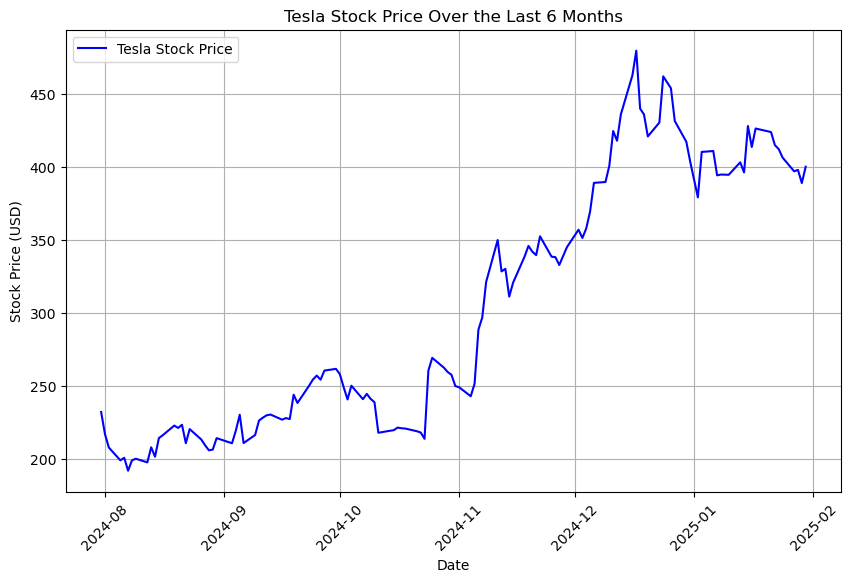

In [23]:
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Download Tesla stock data using yfinance (example for last 6 months)
tesla_data = yf.download("TSLA", period="6mo", interval="1d")

# Step 2: Plot the stock data (e.g., Close price over time)
def make_graph(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Tesla Stock Price', color='blue')
    plt.title('Tesla Stock Price Over the Last 6 Months')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

# Call the function to plot the graph
make_graph(tesla_data)


[*********************100%***********************]  1 of 1 completed


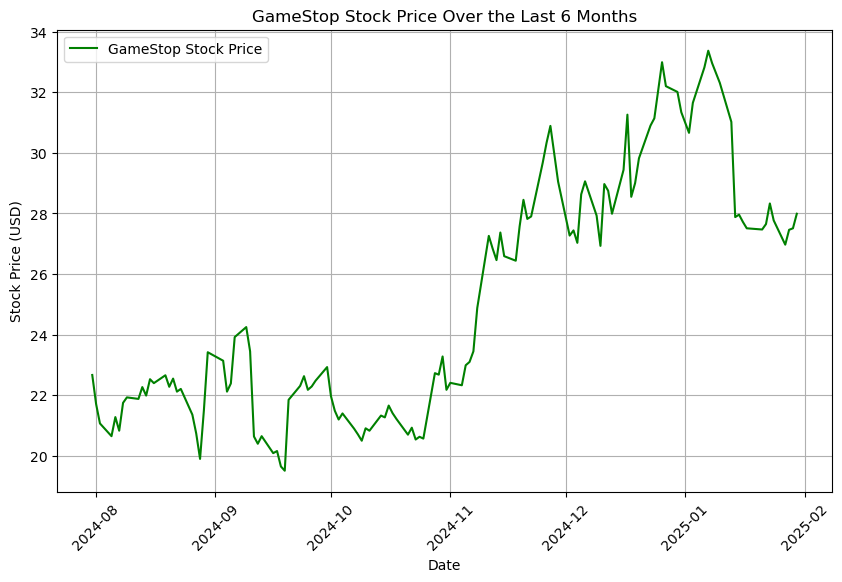

In [25]:
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Download GameStop stock data using yfinance (example for last 6 months)
gme_data = yf.download("GME", period="6mo", interval="1d")

# Step 2: Plot the stock data (e.g., Close price over time)
def make_graph(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='GameStop Stock Price', color='green')
    plt.title('GameStop Stock Price Over the Last 6 Months')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

# Call the function to plot the graph
make_graph(gme_data)
